# Investment Analysis Assignment


Project Brief
You work for Spark Funds, an asset management company. 
Spark Funds wants to make investments in a few companies. 
The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

Note :- For the analyisis i have imputed missing values(Nan) in the raised_amount_usd column with 0

In [4]:
import pandas as pd
import numpy as np
###import wikipedia as wp
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the provided files 

In [6]:
companies = pd.read_csv('companies.txt',sep = '\t' , encoding = "ISO-8859-1")

In [7]:
companies.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [8]:
##checking the percent of Nan records in all the columns

(companies.isna().mean())*100

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

In [9]:
rounds2 = pd.read_csv('rounds2.csv',encoding = "ISO-8859-1")

In [10]:
rounds2.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
### checking the % of null values in every column
(rounds2.isna().mean())*100

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In [12]:
##Dropping the column funding_round_code as it contains 72% Null values

rounds2.drop(['funding_round_code'], axis = 1,inplace= True)

# Converting the company_permalink and permalink columns in rounds2 and comapnies dataframe into lower case

In [13]:
rounds2['company_permalink'] = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies['permalink'] = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

rounds2['company_permalink'] = rounds2.company_permalink.str.lower()
companies['permalink'] = companies.permalink.str.lower()

In [14]:
##Fill Nan with 0's for raised_amount_usd so that the average amount per investment type is calculated correctly

rounds2['raised_amount_usd'] = rounds2.raised_amount_usd.fillna(0)

In [15]:
#unique companies present in rounds2
rounds2['company_permalink'].nunique()

66368

In [16]:
#unique companies present in companies
companies['permalink'].nunique()

66368

In [17]:
#Are there any companies in the rounds2 file which are not present in companies? 

rounds2[~ rounds2.company_permalink.isin(companies.permalink)]

#answer is No

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd


## Merging the two files into a master_dataframe

In [18]:
master_frame = pd.merge(left=companies, right=rounds2, left_on='permalink', right_on='company_permalink',how='inner')

In [19]:
master_frame.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,0.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [20]:
##How many observations are present in master_frame 

master_frame.shape[0]

114949

In [21]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [22]:
##set off scientific notations

pd.options.display.float_format = '{:.5f}'.format

In [23]:
##Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them

master_frame.groupby(['funding_round_type']).mean()

,raised_amount_usd
funding_round_type,
angel,764564.34575
convertible_note,1157471.42102
debt_financing,16517018.25758
equity_crowdfunding,202983.16334
grant,4152010.97500
non_equity_assistance,157161.37696
post_ipo_debt,168704571.82237
post_ipo_equity,80894367.00784
private_equity,62111788.22976


In [24]:
#creating a data frame with funding type as venture 

master_frame_venuture = master_frame[master_frame['funding_round_type'] == 'venture'].copy()

In [25]:
master_frame_venuture.shape

(55494, 15)

In [26]:
#generating the top9 dataframe that contains the subset of 

Amt_raised_by_country = master_frame_venuture.groupby(['country_code']).sum()

top9 = Amt_raised_by_country.sort_values(ascending = False,by = 'raised_amount_usd')[0:9]

top9.columns = ['tot_raised_amount_usd']

top9.reset_index(inplace = True)

top9


,country_code,tot_raised_amount_usd
0,USA,422510842796.00000
1,CHN,39835418773.00000
2,GBR,20245627416.00000
3,IND,14391858718.00000
4,CAN,9583332317.00000
5,FRA,7259536732.00000
6,ISR,6907514579.00000
7,DEU,6346959822.00000
8,JPN,3363676611.00000


## List of English Speaking countries

#using the wikipedia package read the first two tables from the mentioned wiki page to get the list of all countries where 

html = wp.page("List of territorial entities where English is an official language").html().encode("UTF-8")
df = pd.read_html(html)[0]
df = pd.DataFrame(df)
df = df.loc[:,['Country','Alpha-3 code']]
df['Country'] = df['Country'].str.replace('\d+', '').str.replace('[','').str.replace(']','')
###print(df)
##type(df)

df1 = pd.read_html(html)[1]
df1 = pd.DataFrame(df1)
df1 = df1.loc[:,['Country','Alpha-3 code']]
df1['Country'] = df1['Country'].str.replace('\d+', '').str.replace('[','').str.replace(']','')

english_countries = df.append(df1,ignore_index = 'True')

print(english_countries)

# Sector Analysis

In [31]:
mapping = pd.read_csv('mapping.csv',encoding = "ISO-8859-1")

In [32]:
##unpivoting the data using melt function

mapping = mapping.melt(id_vars = ['category_list'] ,var_name='main_sector', value_name='flag')

mapping = mapping[ ~ (mapping['flag'] == 0)]

mapping['category_list'] = mapping['category_list'].str.replace('0','na').str.capitalize()
mapping

,category_list,main_sector,flag
8,Adventure travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social television,"Social, Finance, Analytics, Advertising",1
6123,Social travel,"Social, Finance, Analytics, Advertising",1
6134,Stock exchanges,"Social, Finance, Analytics, Advertising",1


In [33]:
#deriving primany sectors from the category_list column in companies column

master_frame_venuture['primary_sector'] = master_frame_venuture['category_list'].str.capitalize().str.split('|', n = 1 ,expand = True)[0]


In [34]:
master_frame_venuture

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00000,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,0.00000,Application platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00000,Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00000,Curated web
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,0.00000,Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.00000,E-commerce
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.00000,Biotechnology
114937,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.00000,Biotechnology
114941,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,1587301.00000,Enterprise software


In [35]:
master_frame_venuture = pd.merge(left=master_frame_venuture, right=mapping, left_on='primary_sector', right_on='category_list',how='left')

In [36]:
#renaming the required column and dropping unwanted columns

master_frame_venuture.rename(columns = {'category_list_x':'category_list'}, inplace = True)
master_frame_venuture.drop(columns=['category_list_y','flag'],inplace=True)

In [37]:
master_frame_venuture

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00000,Media,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,0.00000,Application platforms,"News, Search and Messaging"
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00000,Apps,"News, Search and Messaging"
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00000,Curated web,"News, Search and Messaging"
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,0.00000,Software,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55489,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.00000,E-commerce,Others
55490,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.00000,Biotechnology,Cleantech / Semiconductors
55491,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.00000,Biotechnology,Cleantech / Semiconductors
55492,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,1587301.00000,Enterprise software,Others


In [38]:
###creating country wise dataframes for top 3 countries limiting only investments between 5 and 15 million usd

D1 = master_frame_venuture[(master_frame_venuture['country_code'] == 'USA') & (master_frame_venuture['raised_amount_usd']>=5000000)&(master_frame_venuture['raised_amount_usd']<=15000000)].copy()
D2 = master_frame_venuture[(master_frame_venuture['country_code'] == 'GBR') & (master_frame_venuture['raised_amount_usd']>=5000000)&(master_frame_venuture['raised_amount_usd']<=15000000)].copy()
D3 = master_frame_venuture[(master_frame_venuture['country_code'] == 'IND') & (master_frame_venuture['raised_amount_usd']>=5000000)&(master_frame_venuture['raised_amount_usd']<=15000000)].copy()

In [39]:
D1['main_sector'].fillna('N/A',inplace = True)
D2['main_sector'].fillna('N/A',inplace = True)
D3['main_sector'].fillna('N/A',inplace = True)


In [40]:
##Getting the total count of investments for all the three dataframes
D1_count = pd.DataFrame(D1.groupby('main_sector').count()['funding_round_permalink'])
D1_count.reset_index(inplace = True)
D1_count.rename(columns = {'funding_round_permalink':'Count'},inplace=True)

D2_count = pd.DataFrame(D2.groupby('main_sector').count()['funding_round_permalink'])
D2_count.reset_index(inplace = True)
D2_count.rename(columns = {'funding_round_permalink':'Count'},inplace=True)

D3_count = pd.DataFrame(D3.groupby('main_sector').count()['funding_round_permalink'])
D3_count.reset_index(inplace = True)
D3_count.rename(columns = {'funding_round_permalink':'Count'},inplace=True)

In [41]:
## Getting the total investment amount for all the three data frames
D1_sum = pd.DataFrame(D1.groupby('main_sector').sum()['raised_amount_usd'])
D1_sum.reset_index(inplace = True)
D1_sum.rename(columns = {'raised_amount_usd':'Investment_amount'},inplace=True)

D2_sum = pd.DataFrame(D2.groupby('main_sector').sum()['raised_amount_usd'])
D2_sum.reset_index(inplace = True)
D2_sum.rename(columns = {'raised_amount_usd':'Investment_amount'},inplace=True)

D3_sum = pd.DataFrame(D3.groupby('main_sector').sum()['raised_amount_usd'])
D3_sum.reset_index(inplace = True)
D3_sum.rename(columns = {'raised_amount_usd':'Investment_amount'},inplace=True)

In [42]:
## Merging both the dataframes to be a single dataframe which has the total investment counts and total investment amounts

D1_agg = pd.merge(left=D1_count, right=D1_sum, left_on='main_sector', right_on='main_sector',how='inner')
D2_agg = pd.merge(left=D2_count, right=D2_sum, left_on='main_sector', right_on='main_sector',how='inner')
D3_agg = pd.merge(left=D3_count, right=D3_sum, left_on='main_sector', right_on='main_sector',how='inner')

In [43]:
## Adding the total count and total amount columns to dataframes D1,D2,D3
D1 = pd.merge(left=D1, right=D1_agg, left_on='main_sector', right_on='main_sector',how='left')
D2 = pd.merge(left=D2, right=D2_agg, left_on='main_sector', right_on='main_sector',how='left')
D3 = pd.merge(left=D3, right=D3_agg, left_on='main_sector', right_on='main_sector',how='left')

In [44]:
##Renaming the columns to Total_Investment_count & Total_Investment_amount

D1.rename(columns = {'Count':'Total_Investment_count','Investment_amount':'Total_Investment_amount'}, inplace = True)
D2.rename(columns = {'Count':'Total_Investment_count','Investment_amount':'Total_Investment_amount'}, inplace = True)
D3.rename(columns = {'Count':'Total_Investment_count','Investment_amount':'Total_Investment_amount'}, inplace = True)

In [45]:
##Finding the most investments by sector for USA
D1_agg.sort_values(ascending=False , by = 'Count')

,main_sector,Count,Investment_amount
8,Others,2950,26321007002.00000
9,"Social, Finance, Analytics, Advertising",2714,23807376964.00000
2,Cleantech / Semiconductors,2350,21633430822.00000
7,"News, Search and Messaging",1583,13971567428.00000
4,Health,909,8211859357.00000
5,Manufacturing,799,7258553378.00000
3,Entertainment,591,5099197982.00000
0,Automotive & Sports,167,1454104361.00000
1,Blanks,86,764763292.00000
6,N/A,1,9486929.00000


In [46]:
##Finding the most investments by sector for GBR
D2_agg.sort_values(ascending=False , by = 'Count')

,main_sector,Count,Investment_amount
7,Others,147,1283624289.00000
8,"Social, Finance, Analytics, Advertising",133,1089404014.00000
2,Cleantech / Semiconductors,130,1163990056.00000
6,"News, Search and Messaging",73,615746235.00000
3,Entertainment,56,482784687.00000
5,Manufacturing,42,361940335.00000
4,Health,24,214537510.00000
0,Automotive & Sports,16,167051565.00000
1,Blanks,7,57764848.00000


In [47]:
##Finding the most investments by sector for IND
D3_agg.sort_values(ascending=False , by = 'Count')

,main_sector,Count,Investment_amount
7,Others,110,1013409507.00000
8,"Social, Finance, Analytics, Advertising",60,550549550.00000
6,"News, Search and Messaging",52,433834545.00000
3,Entertainment,33,280830000.00000
5,Manufacturing,21,200900000.00000
2,Cleantech / Semiconductors,20,165380000.00000
4,Health,19,167740000.00000
0,Automotive & Sports,13,136900000.00000
1,Blanks,2,27000000.00000


In [48]:
##Finding the top three companies for top sector in  USA
d1_company_topsector = D1[D1['main_sector'] == 'Others'].groupby('permalink').sum()['raised_amount_usd']
d1_company_topsector.sort_values(ascending=False )[0:3]

permalink
/organization/virtustream         64300000.00000
/organization/capella             54968051.00000
/organization/airtight-networks   54201907.00000
Name: raised_amount_usd, dtype: float64

In [49]:
##Finding the top three companies for top sector in  GBR
d2_company_topsector = D2[D2['main_sector'] == 'Others'].groupby('permalink').sum()['raised_amount_usd']
d2_company_topsector.sort_values(ascending=False )[0:3]

permalink
/organization/electric-cloud   37000000.00000
/organization/sensage          36250000.00000
/organization/enigmatic        32500000.00000
Name: raised_amount_usd, dtype: float64

In [50]:
##Finding the top three companies for top sector in  IND
d3_company_topsector = D3[D3['main_sector'] == 'Others'].groupby('permalink').sum()['raised_amount_usd']
d3_company_topsector.sort_values(ascending=False )[0:3]

permalink
/organization/firstcry-com   39000000.00000
/organization/myntra         38000000.00000
/organization/commonfloor    32900000.00000
Name: raised_amount_usd, dtype: float64

In [51]:
##Finding the top three companies for second best sector in  USA
d1_company_secondbestsector = D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink').sum()['raised_amount_usd']
d1_company_secondbestsector.sort_values(ascending=False )[0:3]

permalink
/organization/shotspotter   67933006.00000
/organization/demandbase    63000000.00000
/organization/intacct       61800000.00000
Name: raised_amount_usd, dtype: float64

In [52]:
##Finding the top three companies for second best sector in  GBR

d2_company_secondbestsector = D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink').sum()['raised_amount_usd']
d2_company_secondbestsector.sort_values(ascending=False )[0:3]

permalink
/organization/celltick-technologies   37500000.00000
/organization/mythings                34000000.00000
/organization/zopa                    32900000.00000
Name: raised_amount_usd, dtype: float64

In [53]:
##Finding the top three invested companies for second best sector in  IND

d3_company_secondbestsector = D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink').sum()['raised_amount_usd']
d3_company_secondbestsector.sort_values(ascending=False )[0:3]

permalink
/organization/manthan-systems   50700000.00000
/organization/komli-media       28000000.00000
/organization/shopclues-com     25000000.00000
Name: raised_amount_usd, dtype: float64

# ## Checkpoint 6 : Plots

In [54]:
### Getting the average investement amount for the four mentioned funding type 

avg_investment = master_frame[master_frame['funding_round_type'].isin(['angel','venture','seed','private_equity'])].groupby(['funding_round_type']).mean()

avg_investment.reset_index(inplace = True)

avg_investment['raised_amount_usd'] = avg_investment['raised_amount_usd']/1000000


In [55]:
Fraction_of_total_investment = pd.DataFrame(master_frame[master_frame['funding_round_type'].isin(['angel','venture','seed','private_equity'])].groupby(['funding_round_type']).sum())

Fraction_of_total_investment.reset_index(inplace=True)

Fraction_of_total_investment['Pct'] = (Fraction_of_total_investment.raised_amount_usd/ Fraction_of_total_investment.raised_amount_usd.sum())*100

In [56]:
Fraction_of_total_investment.sort_values(by = 'Pct' , ascending = False,inplace= True)
labels = list(Fraction_of_total_investment.funding_round_type)
sizes = list(Fraction_of_total_investment.Pct.round(3))
explode = (0.1,0,0,0)

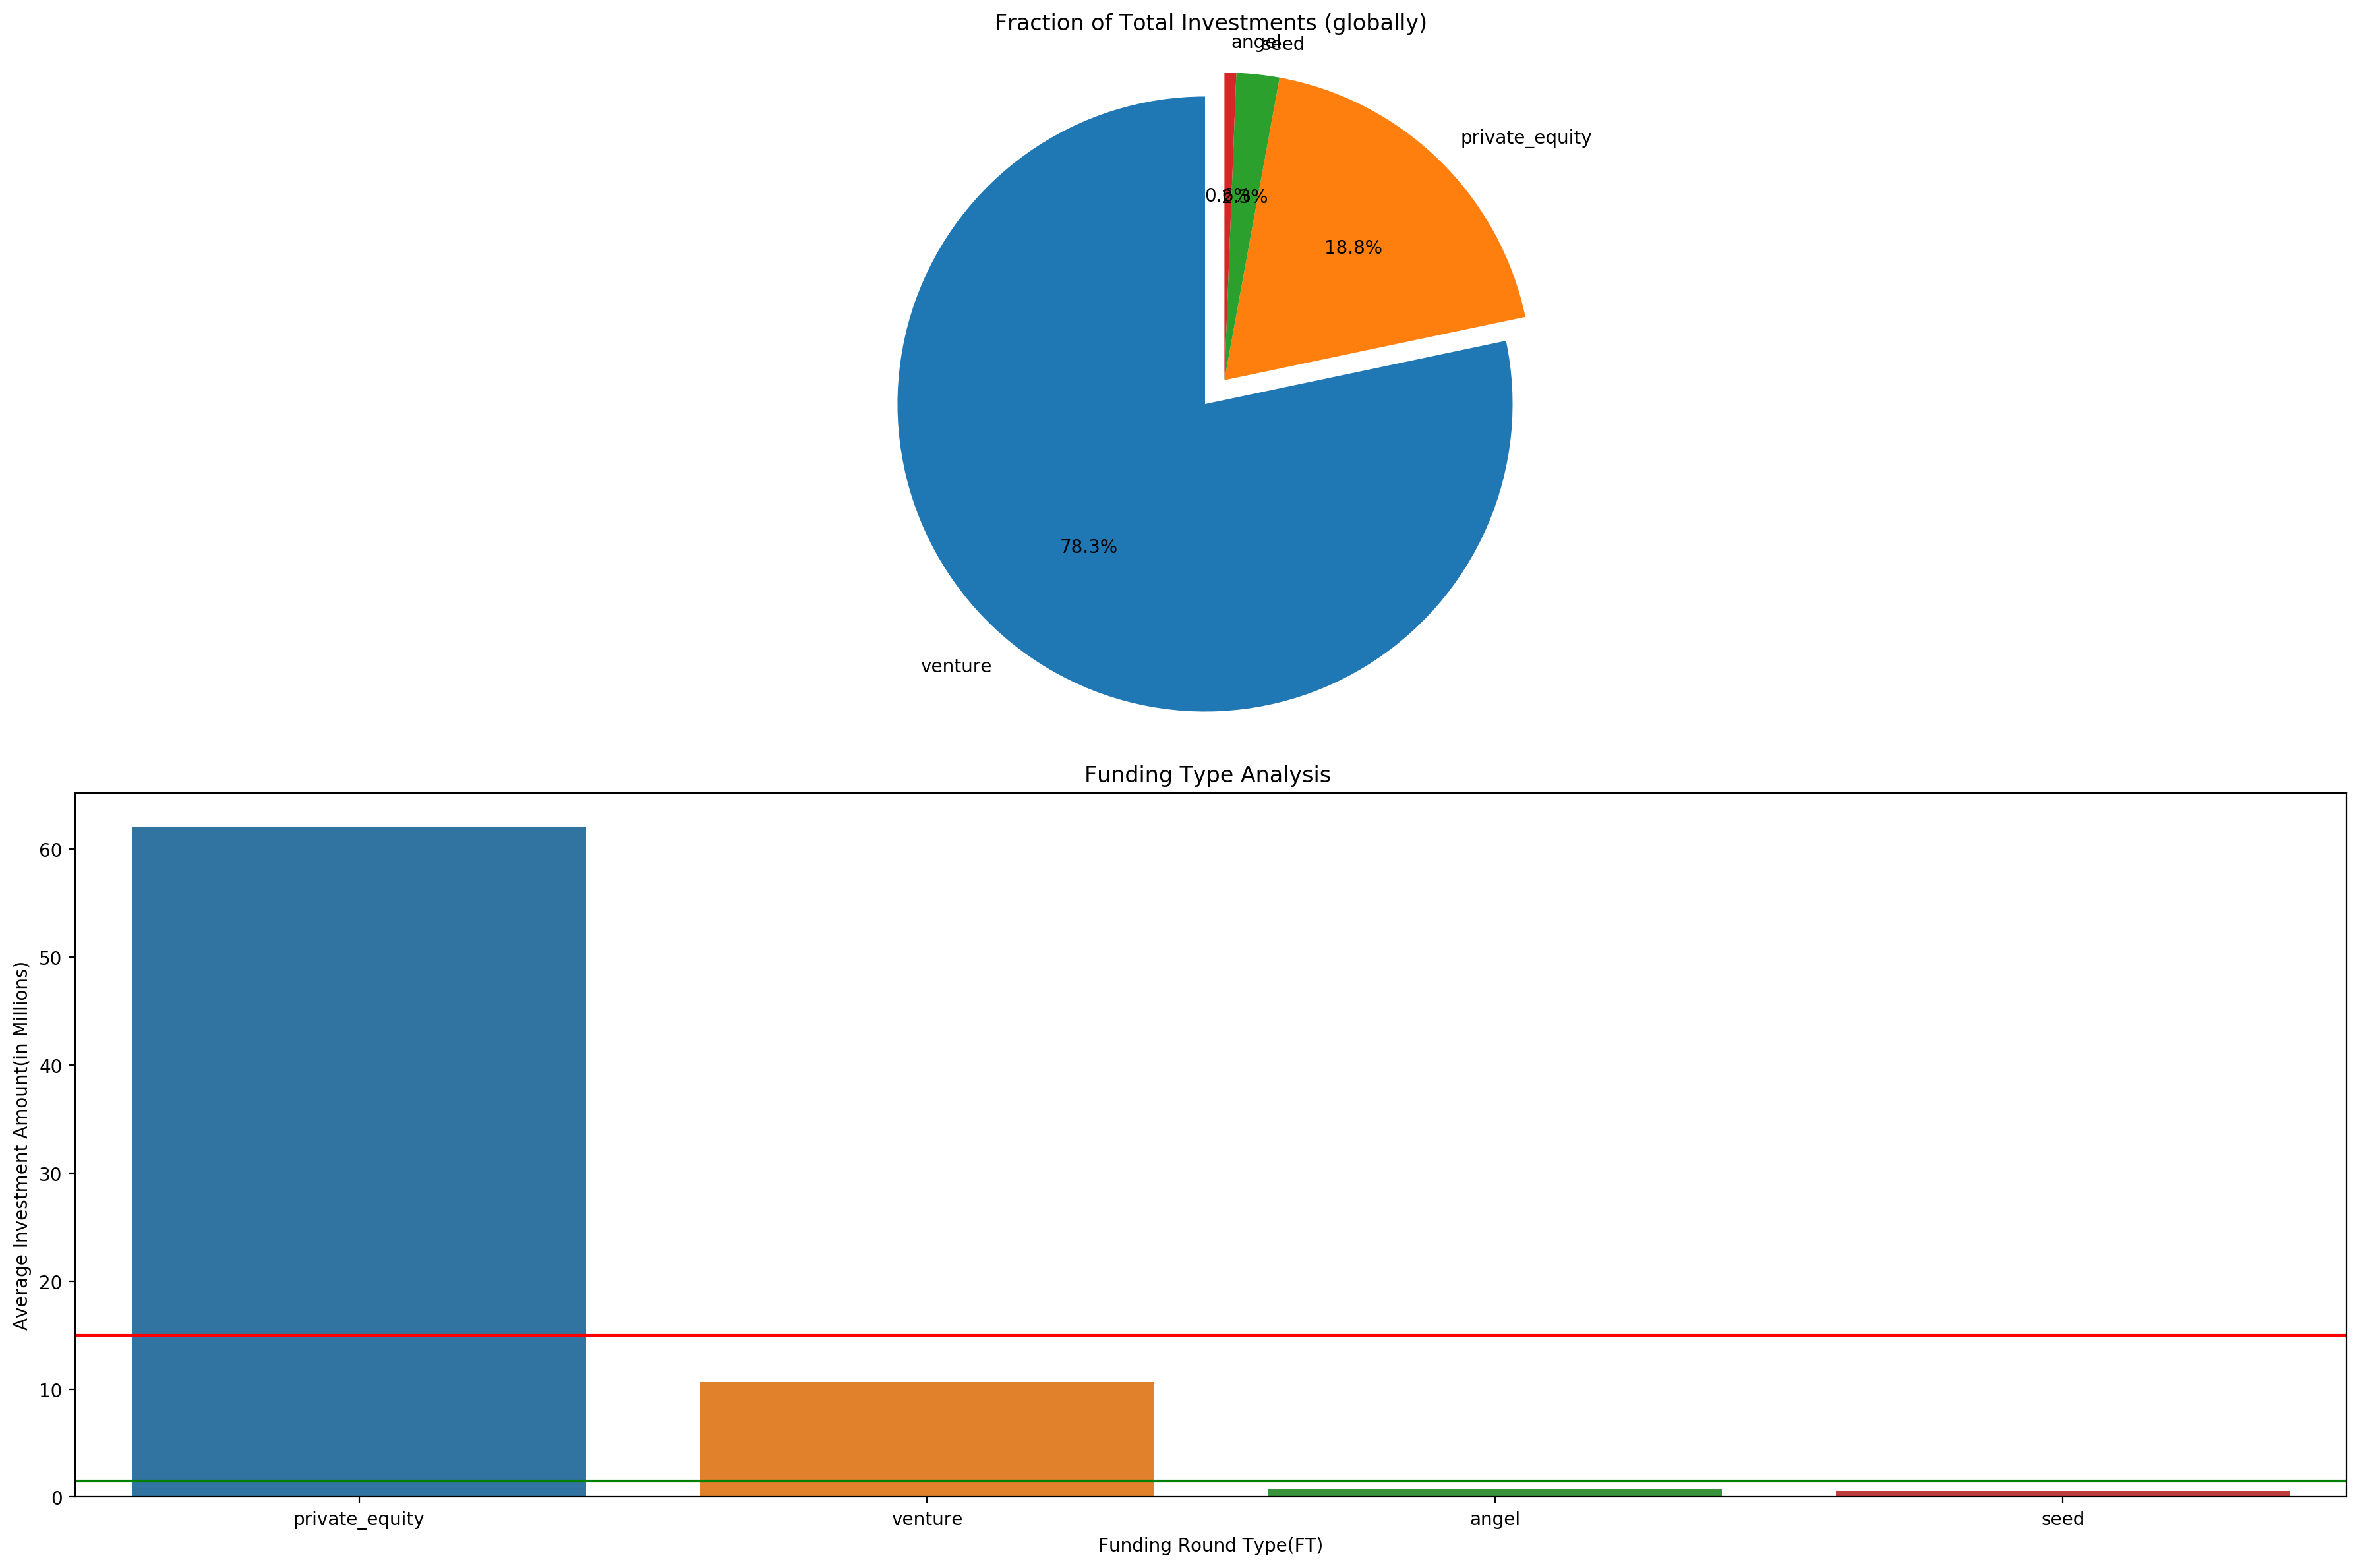

In [57]:
plt.figure(figsize=(18,12),dpi = 200)

plt.subplot(2, 1, 1)
plt.title('Fraction of Total Investments (globally)')
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90) 
plt.axis('equal') 


plt.subplot(2, 1, 2)
###plt.figure(figsize=(9,8))
g=sns.barplot(x='funding_round_type',y='raised_amount_usd', data = avg_investment 
            , order = ['private_equity','venture','angel','seed']
            )

g.set(xlabel='Funding Round Type(FT)', ylabel='Average Investment Amount(in Millions)'
                  ,title='Funding Type Analysis ')
g.axhline(1.5 , color='green')
g.axhline(15 , color='red')

plt.tight_layout()
plt.show()


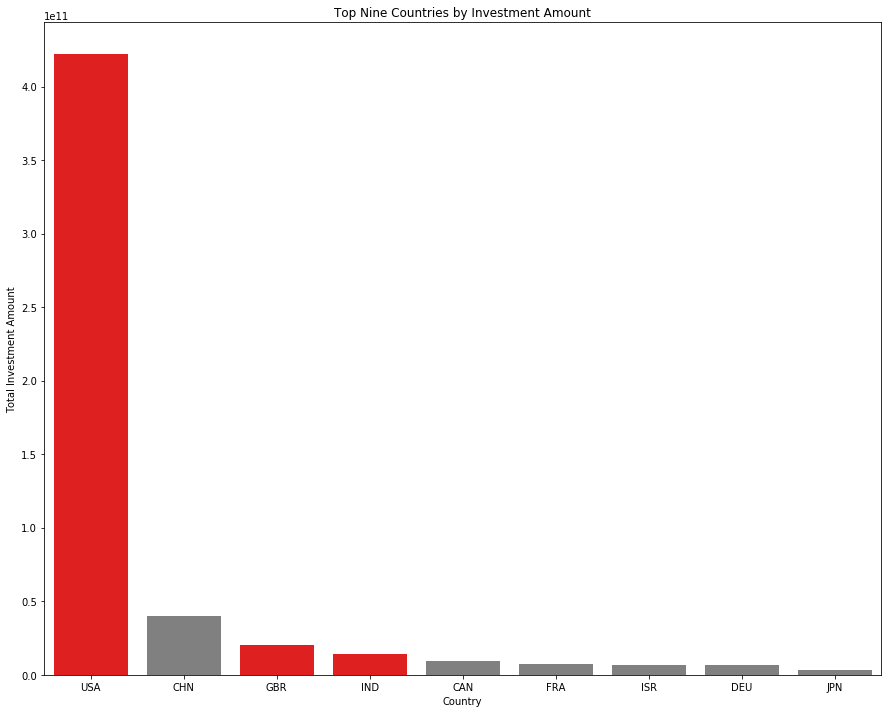

In [58]:
##plot showing the top 9 countries against the total amount of investments of funding type FT 
##top three english speaking countries are highlighted in red

top9_plt = top9.rename(columns={'tot_raised_amount_usd':'total_invested_amount'})

clrs = ['red' if (x in ['USA','GBR','IND']) else 'grey' for x in top9_plt.country_code ]

plt.figure(figsize=(15,12))

gtop9 = sns.barplot(x='country_code',y='total_invested_amount', data = top9_plt 
            , order =['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN']
            ,palette=clrs).set(xlabel='Country', ylabel='Total Investment Amount'
                               ,title = 'Top Nine Countries by Investment Amount')


plt.show()

### Coloring the top three countries where english is one the main languages.


In [59]:
#creating aggregated dataframe containing top three sectors in each of the top 3 contries where english is one of the primary language

D1_agg.sort_values(ascending=False , by = 'Count')[0:3]

D1_agg_USA_top3 = D1_agg.sort_values(ascending=False , by = 'Count')[0:3]

D1_agg_USA_top3['Country'] = 'USA'


D2_agg_GBR_top3 = D2_agg.sort_values(ascending=False , by = 'Count')[0:3]

D2_agg_GBR_top3['Country'] = 'GBR'


D3_agg_IND_top3 = D3_agg.sort_values(ascending=False , by = 'Count')[0:3]

D3_agg_IND_top3['Country'] = 'IND'


df_Top3cntry_top3sector = pd.concat([D1_agg_USA_top3,D2_agg_GBR_top3,D3_agg_IND_top3],ignore_index=True)

df_Top3cntry_top3sector = df_Top3cntry_top3sector.drop(['Investment_amount'],axis =1)

df_Top3cntry_top3sector

,main_sector,Count,Country
0,Others,2950,USA
1,"Social, Finance, Analytics, Advertising",2714,USA
2,Cleantech / Semiconductors,2350,USA
3,Others,147,GBR
4,"Social, Finance, Analytics, Advertising",133,GBR
5,Cleantech / Semiconductors,130,GBR
6,Others,110,IND
7,"Social, Finance, Analytics, Advertising",60,IND
8,"News, Search and Messaging",52,IND


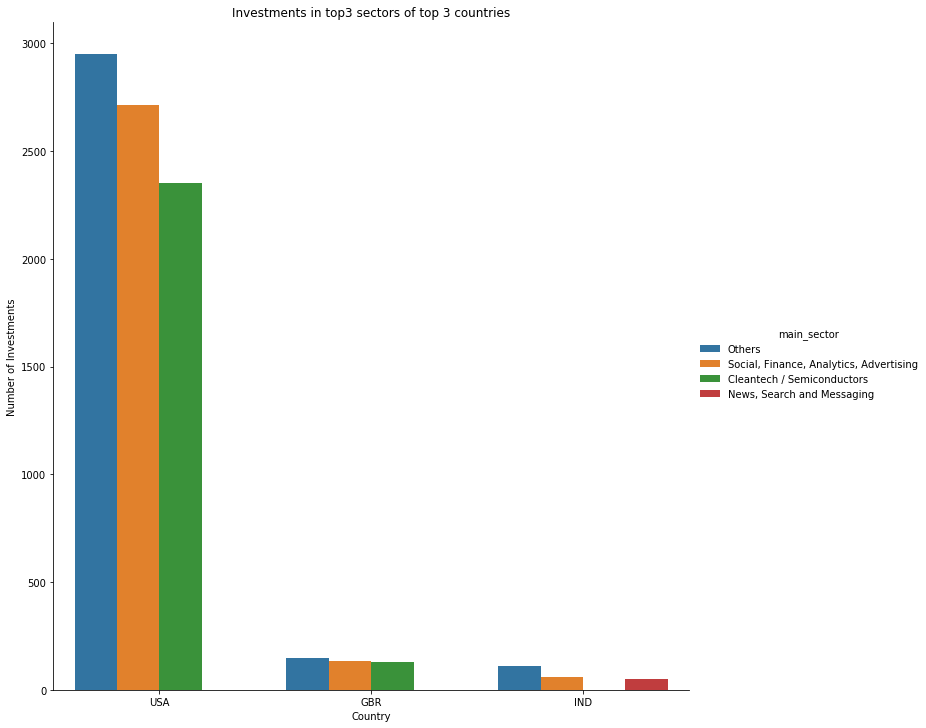

In [60]:
##top 3 sectors of the top 3 countries

sns.catplot(x="Country",y="Count",kind='bar',hue='main_sector'
            ,data=df_Top3cntry_top3sector,height=10, aspect=1).set(xlabel='Country', ylabel='Number of Investments',
                                                                   title = 'Investments in top3 sectors of top 3 countries')